In [7]:
# Import Packages
import numpy as np
import pickle as pk
import Area_Avg
import matplotlib as mpl
from matplotlib import pyplot as plt
from netCDF4 import Dataset
mpl.rc('font',size=22)
mpl.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
mpl.rc('text', usetex=True)
plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [2]:
CAM3_RCP45_EB = pk.load(open(\
    'Perspectives_From_WAVD_Pickled/Energy Budget/Planck/RCP45/CAM3_RCP45_Planck_ZM.pickle','rb'))
CAM3_wAVD_EB = pk.load(open(\
    'Perspectives_From_WAVD_Pickled/Energy Budget/Planck/wAVD/CAM3_wAVD_Planck_ZM.pickle','rb'))

GFDL_RCP45_EB = pk.load(open(\
    'Perspectives_From_WAVD_Pickled/Energy Budget/Planck/RCP45/GFDL_RCP45_Planck_ZM.pickle','rb'))
GFDL_wAVD_EB = pk.load(open(\
    'Perspectives_From_WAVD_Pickled/Energy Budget/Planck/wAVD/GFDL_wAVD_Planck_ZM.pickle','rb'))

ECHAM6_RCP45_EB = pk.load(open(\
    'Perspectives_From_WAVD_Pickled/Energy Budget/Planck/RCP45/ECHAM6_RCP45_Planck_ZM.pickle','rb'))
ECHAM6_wAVD_EB = pk.load(open(\
    'Perspectives_From_WAVD_Pickled/Energy Budget/Planck/wAVD/ECHAM6_wAVD_Planck_ZM.pickle','rb'))

In [3]:
Lat = np.linspace(-90,90,64)

In [4]:
wAVD_dST_CAM3Grid = pk.load(open(\
   "Perspectives_From_WAVD_Pickled/Future Projection CC Responses/wAVD_dST_CAM3Grid.pickle","rb"),encoding='latin1')
wAVD_dST_CAM3Grid = np.mean(wAVD_dST_CAM3Grid,axis=(1,2))
RCP45_dST_CAM3Grid = pk.load(open(\
   "Perspectives_From_WAVD_Pickled/Future Projection CC Responses/RCP45_dST_CAM3Grid.pickle","rb"),encoding='latin1')
RCP45_dST_CAM3Grid = np.mean(RCP45_dST_CAM3Grid,axis=(1,2))

In [5]:
CAM3_RCP45_FB = CAM3_RCP45_EB/RCP45_dST_CAM3Grid
CAM3_wAVD_FB = CAM3_wAVD_EB/wAVD_dST_CAM3Grid
GFDL_RCP45_FB = GFDL_RCP45_EB/RCP45_dST_CAM3Grid
GFDL_wAVD_FB = GFDL_wAVD_EB/wAVD_dST_CAM3Grid
ECHAM6_RCP45_FB = ECHAM6_RCP45_EB/RCP45_dST_CAM3Grid
ECHAM6_wAVD_FB = ECHAM6_wAVD_EB/wAVD_dST_CAM3Grid

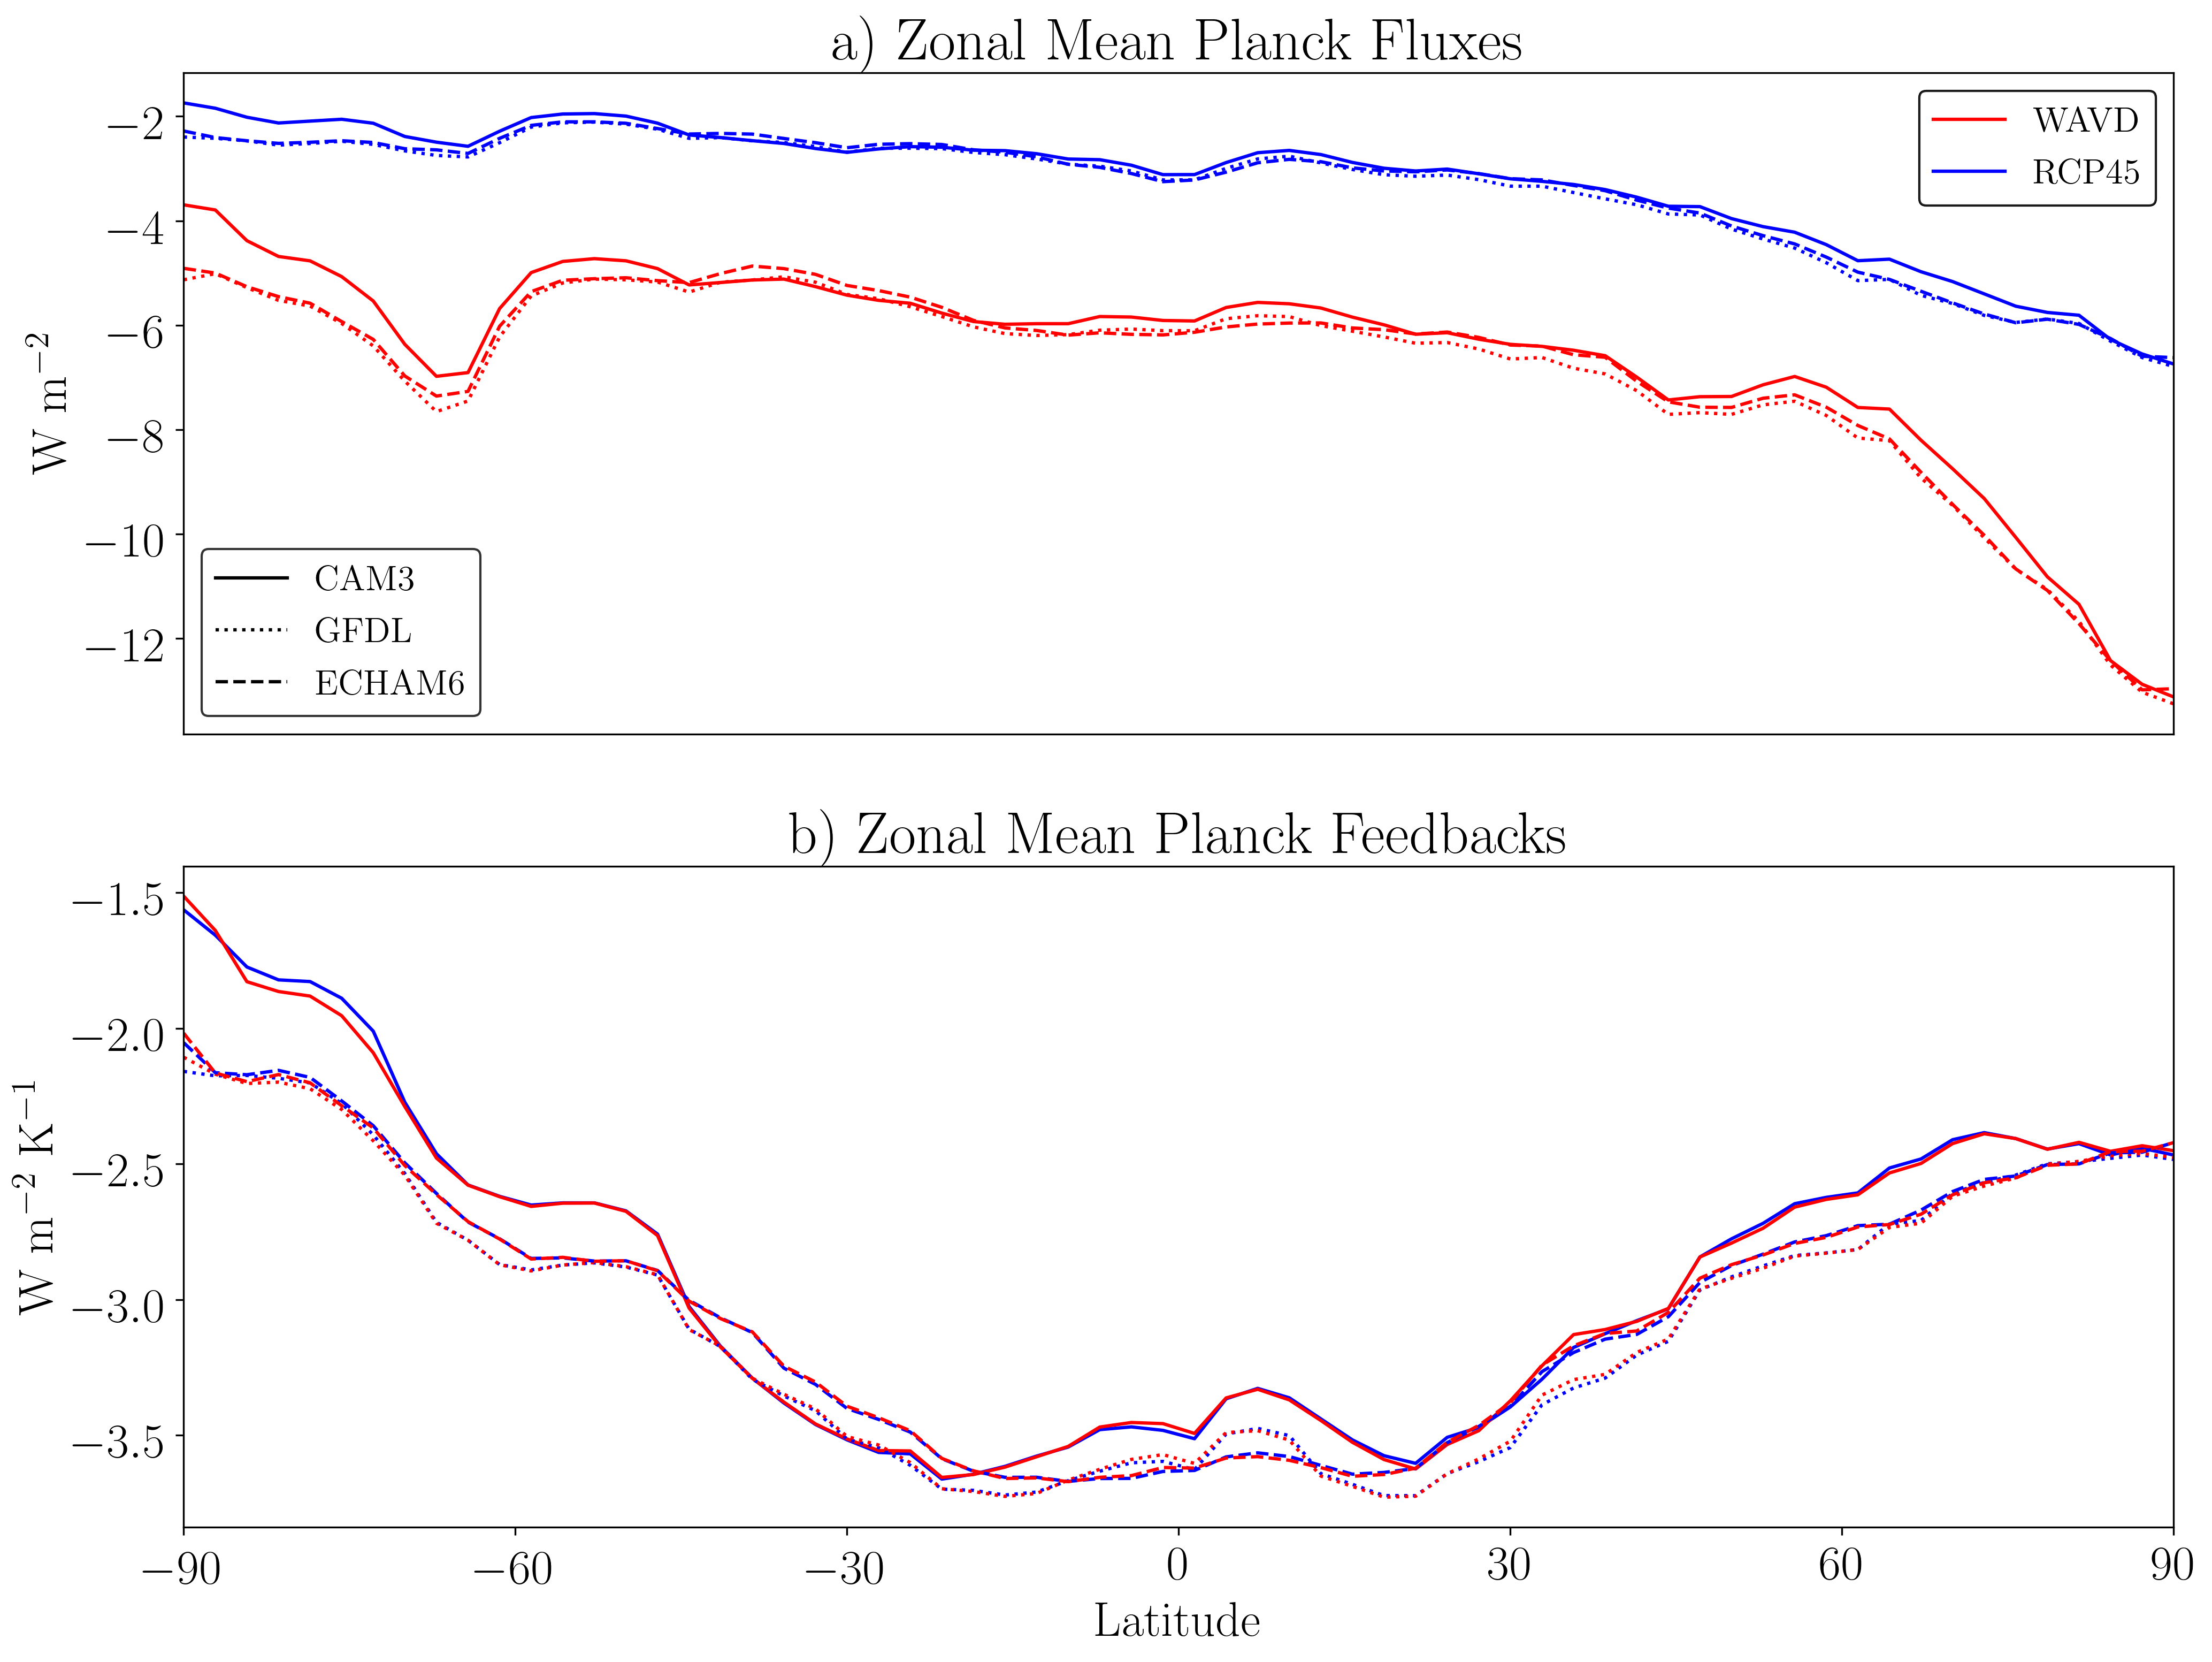

In [8]:
fig = plt.figure(figsize=(16,12),dpi=300)

plt.subplot(2,1,1)
plt.title('a) Zonal Mean Planck Fluxes')

plt.plot(Lat,np.mean(CAM3_RCP45_EB,axis=0),color='blue')
plt.plot(Lat,np.mean(CAM3_wAVD_EB,axis=0),color='red')
plt.plot(Lat,np.mean(GFDL_RCP45_EB,axis=0),color='blue',linestyle=':')
plt.plot(Lat,np.mean(GFDL_wAVD_EB,axis=0),color='red',linestyle=':')
plt.plot(Lat,np.mean(ECHAM6_RCP45_EB,axis=0),color='blue',linestyle='--')
plt.plot(Lat,np.mean(ECHAM6_wAVD_EB,axis=0),color='red',linestyle='--')
plt.xticks([])
plt.yticks(np.arange(-12,-1.9,2))
plt.ylabel("W m$^{-2}$")

G = plt.plot(np.nan,label='WAVD',color='red')
H = plt.plot(np.nan,label='RCP45',color='blue')

A = plt.plot(np.nan,label='CAM3',linestyle='-',color='k')
B = plt.plot(np.nan,label='GFDL',linestyle=':',color='k')
C = plt.plot(np.nan,label='ECHAM6',linestyle='--',color='k')

first_legend = plt.legend(handles=[A[0],B[0],C[0]],loc='lower left',fontsize=16)
first_legend.get_frame().set_edgecolor('k')
ax = plt.gca().add_artist(first_legend)

second_legend = plt.legend(handles=[G[0],H[0]],loc='upper right',fontsize=16)
second_legend.get_frame().set_edgecolor('k')
ax2 = plt.gca().add_artist(second_legend)

plt.subplot(2,1,2)
plt.title('b) Zonal Mean Planck Feedbacks')

plt.plot(Lat,np.mean(CAM3_RCP45_FB,axis=0),color='blue')
plt.plot(Lat,np.mean(CAM3_wAVD_FB,axis=0),color='red')
plt.plot(Lat,np.mean(GFDL_RCP45_FB,axis=0),color='blue',linestyle=':')
plt.plot(Lat,np.mean(GFDL_wAVD_FB,axis=0),color='red',linestyle=':')
plt.plot(Lat,np.mean(ECHAM6_RCP45_FB,axis=0),color='blue',linestyle='--')
plt.plot(Lat,np.mean(ECHAM6_wAVD_FB,axis=0),color='red',linestyle='--')
plt.xlabel('Latitude')
plt.ylabel("W m$^{-2}$ K$^{-1}$")
plt.xticks(range(-90,91,30));

#plt.savefig('ZM_Planck.png',bbox_inches='tight')